In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

<img src="https://s12.favim.com/gif_previews/6/658/6589/65893/6589313.gif">

# In this Data Analysis we would be analysing what are the factors that are respnsible for heart attack in a person

# Contents
<ul>
    <li>Importing the Libraries </li>
    <li>Reading the files </li>
    <li>Visualisations</li>
    <li> Analysis of single variable </li> 
    <li> Analysis of double variable </li>
    <li>Plotting the required graphs </li>
    <li>Estabilishing a relationship </li>
    <li> Conclusion </li>
    </ul>

# Importing the Libraries

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import scipy as sp
import re
import time
import matplotlib.pyplot as plt
import seaborn as sns
import os
import plotly.express as px
import matplotlib as mpl

# Reading the files

In [ ]:
df=pd.read_csv('../input/heart-attack-analysis-prediction-dataset/heart.csv')

``Finding the shape of the data``

In [ ]:
df.shape

``Data contains 303 rows and 14 columns``

``Finding the top 5 elements``


In [ ]:
df.head()

In [ ]:
df

In [ ]:
df.info

``Finding the null values``

In [ ]:
df.isnull().values.any()


``It shows it has no null values``

**Showing unique values in the dataset**

In [ ]:
df.nunique()

# Visualisations

In [ ]:
plt.figure(figsize=(15,8))
plt.title('Age VS Count',size=20)
sns.histplot(df['age'],bins=48)
plt.xticks(list(range(29,79,1)))
plt.yticks(list(range(0,20,1)))
plt.show()

In [ ]:
sex=df['sex'].value_counts()
plt.title('Finding the sex',size=20)
sns.barplot(x=sex.index,y=sex.values)
print(df.sex.value_counts())


In [ ]:
plt.figure(figsize=(6,4))
sex=df['sex'].value_counts().reset_index()
px.pie(sex,names='index',values='sex')

``Data shows 207 males and 96 females``

In [ ]:
cp=df['cp'].value_counts()
plt.title('Finding the type of chest pain',size=20)
sns.barplot(x=cp.index,y=cp.values)
print(df.cp.value_counts())

``Value 1 typical angina=143
Value 2 atypical angina=87
Value 3  non-anginal pain=50
Value 4  asymptomatic=23``

#   Resting blood pressure (in mm Hg)

In [ ]:
plt.figure(figsize=(20,20))
sns.displot(df['trtbps'])
plt.xticks(list(range(90,200,10)))
plt.show()
print(df.trtbps.value_counts())

``It shows Bp in ascending order values ranging from 94 to 200``

In [ ]:
plt.figure(figsize=(15,8))
plt.title('Trtbps VS Count',size=20)
sns.histplot(df['trtbps'],bins=115)
plt.xticks(list(range(90,205,5)))
#plt.yticks(list(range(0,20,1)))
plt.show()

# Cholestoral in mg/dl fetched via BMI sensor

In [ ]:
plt.figure(figsize=(15,8))
plt.title('Chol VS Count',size=20)
sns.histplot(df['chol'])
#plt.xticks(list(range(29,79,1)))
#plt.yticks(list(range(0,20,1)))
plt.show()

#  Maximum heart rate achieved

In [ ]:
plt.figure(figsize=(15,8))
plt.title('Thalachh VS Count',size=20)
sns.histplot(df['thalachh'])
plt.xticks(list(range(70,210,5)))
plt.yticks(list(range(0,60,2)))
plt.show()

``Shows data ranging from 71 to 202``

# Fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)

In [ ]:
fbs=df['fbs'].value_counts()
plt.title('Finding the FBS',size=20)
sns.barplot(x=fbs.index,y=fbs.values)
print(df.fbs.value_counts())


``There are 258 false values and 45 true values``

In [ ]:
plt.figure(figsize=(6,4))
fbs=df['fbs'].value_counts().reset_index()
px.pie(fbs,names='index',values='fbs')

# Data of Resting Electrocardiographic Results

In [ ]:
restecg=df['restecg'].value_counts()
plt.title('Resting Electrocardiographic Results',size=20)
sns.barplot(x=restecg.index,y=restecg.values)
plt.show()
print(df.restecg.value_counts())

````152: normal
147: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
4: showing probable or definite left ventricular hypertrophy by Estes criteria````

# Exercise Induced angina (1 = yes; 0 = no)

In [ ]:
exng=df['exng'].value_counts()
plt.title('Exercise induced angina (1 = yes; 0 = no)',size=20)
sns.barplot(x=exng.index,y=exng.values)
plt.show()
print(df.exng.value_counts())

# Person getting heart attack 

In [ ]:
output=df['output'].value_counts()
plt.title(' 0= less chance of heart attack 1= more chance of heart attack ',size=20)
sns.barplot(x=output.index,y=output.values)
plt.show()
print(df.output.value_counts())

``Data shows 165 people have more chance of heart attack and 138 people have less chance``

# Analysing the values of thall

In [ ]:
thall=df['thall'].value_counts()
plt.title('Thall vs Counts')
sns.barplot(x=thall.index,y=thall.values)
plt.xlabel('Thall',size=20)
plt.ylabel('Counts',size=20)
print(df.thall.value_counts())

``The data shows that 2 ~ 166   , 3  ~  117 ,  1  ~  18 ,0  ~  2  are the values of thall with thier index``

# CAA shows  number of blood vessels

In [ ]:
caa=df['caa'].value_counts()
plt.title('CAA vs Counts')
sns.barplot(x=caa.index,y=caa.values)
plt.xlabel('CAA',size=20)
plt.ylabel('Counts',size=20)
print(df.caa.value_counts())

`` Data shows the value of Caa 
0    175
1     65
2     38
3     20
4      5
``


# Data shows the SLP or language used by doctor to cure patients

In [ ]:
slp=df['slp'].value_counts()
plt.title('SLP vs Counts')
sns.barplot(x=slp.index,y=slp.values)
plt.xlabel('SLP',size=20)
plt.ylabel('Counts',size=20)
print(df.slp.value_counts())

``
index values
2      142
1      140
0       21``

# Analysis using two variables

In [ ]:
df[['age','output']].value_counts().sort_values()

In [ ]:
A=pd.crosstab(df['age'],df['output']).reset_index()
A.columns=['age','lowrisk','highrisk']
A.head(10)

``Data shows age with risk of heart attack``

In [ ]:
px.line(A,A['age'],A['highrisk'],range_x=(25,80),title='Age with High chance of getting stroke')



``Data shows that people with age between 50 and 55 are most prone to getting a stroke``

In [ ]:
px.line(A,A['age'],A['lowrisk'],range_x=(25,80),title='Age with Low chance of getting stroke')


``At age 58 it the most chance of getting a heart stroke while it increases with increase in age``

In [ ]:
plt.figure(figsize=(10,8))
sns.lmplot(x='age',y='trtbps',hue='output',data=df)
plt.title('Shows relation between age and Resting blood pressure',size=20)
plt.show()


``As age increases both factors increases but less chance of getting heart attack increses more as compared with risk of getting attack`` 

# Relation between getting heart attack with Cholestrol level

In [ ]:
plt.figure(figsize=(10,8))
sns.lmplot(x='age',y='chol',hue='output',data=df)
plt.title('Age vs cholestrol with respect to heart attack',size=20)
plt.show()


``At age around 40 there is less change of getting a heart attack but as age increases getting heart attack is more as comparing with cholestrol level``

In [ ]:
plt.figure(figsize=(10,8))
sns.lmplot(x='age',y='thalachh',hue='output',data=df)
plt.title('Age vs Maximum heart rate achieved with respect to heart attack',size=20)
plt.show()


``Maximum heart rate decreases with increases in age and chances of getting risk of heart attack decreses and vice versa``

In [ ]:
sns.kdeplot(x='chol',y='output',data=df)

In [ ]:
sns.scatterplot(x='chol',y='output',data=df)

In [ ]:
sns.histplot(x='chol',y='output',data=df)

In [ ]:
sns.swarmplot(y='chol',x='output',data=df)

# Age vs Stroke Analysis

In [ ]:
plt.style.use('classic')
sns.histplot(x='age',data=df,hue='output',palette='pastel')
plt.title('Age vs stroke analysis',size=20)
plt.grid()
plt.show()

``This shows that the chances of getting a stroke is more in the age between 40 to 50 and as the age increases the changes of getting more prone to stroke decreases``

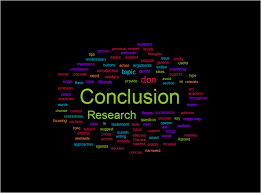

``#This shows that the chances of getting a stroke is more in the age between 40 to 50 and as the age increases the changes of getting more prone to stroke decreases

#Maximum heart rate decreases with increases in age and chances of getting risk of heart attack decreses and vice versa 

#As age increases both factors increases but less chance of getting heart attack increses more as compared with risk of getting attack 

#As cholestrol level increases there are more chances of getting heart strokes
Age 40  to 50 is most dangerous and getting mild and severe stroke is the maximum here

#As age increases the risk is less as compared to the age between 40 to 50``


# THIS KERNEL ENDS HERE
 
 # OPEN FOR SUGGESTIONS AND COMPLAINTS

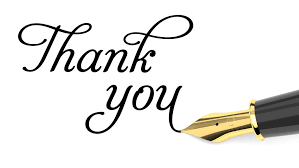